In [1]:
# Importing the dataset with Keras and transforming it
from keras.datasets import mnist
from keras import backend as K
from keras import utils as np_utils

def mnist_data():
    # input image dimensions
    img_rows, img_cols = 28, 28
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
        X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
        X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    # rescale [0,255] --> [0,1]
    X_train = X_train.astype('float32')/255
    X_test = X_test.astype('float32')/255

    # transform to one hot encoding
    Y_train = np_utils.to_categorical(Y_train, 10)
    Y_test = np_utils.to_categorical(Y_test, 10)

    return (X_train, Y_train), (X_test, Y_test)

(X_train, Y_train), (X_test, Y_test) = mnist_data()

Using TensorFlow backend.
C:\Users\Jings\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jings\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:456: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jings\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:457: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jings\Anaconda3\envs\te

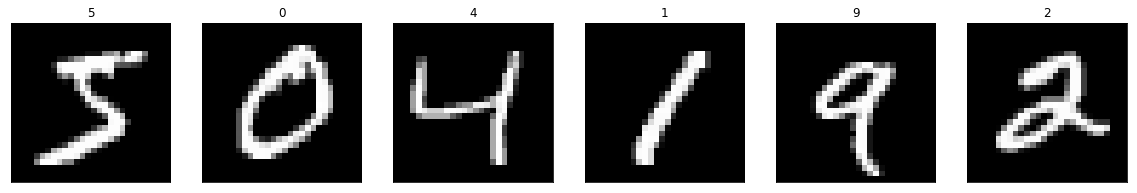

In [2]:
# plot first six training images
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

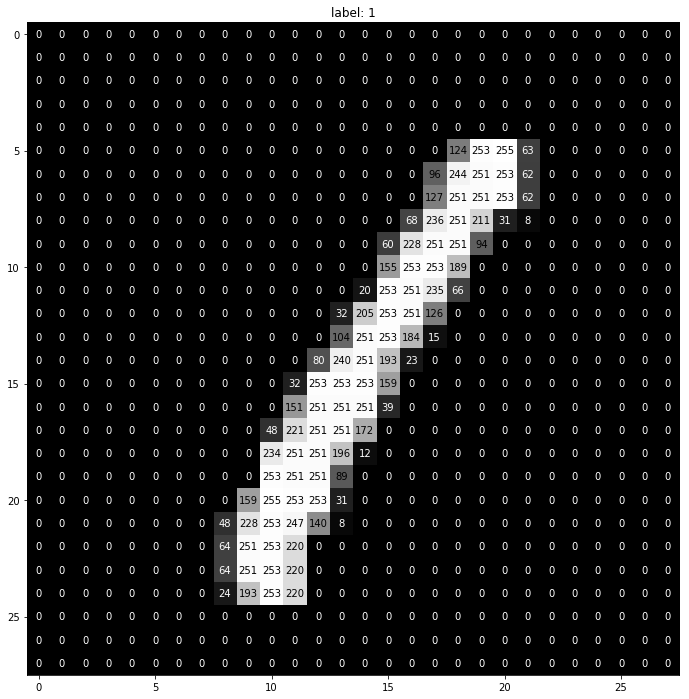

In [3]:
# visualize one number with pixel values
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')  # cmap: color map
    width, height = img.shape
    tag = img.max()/3
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<tag else 'black')

            
# test keras x_train data
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.set_title('label: '+str(y_train[3]))
visualize_input(X_train[3], ax)

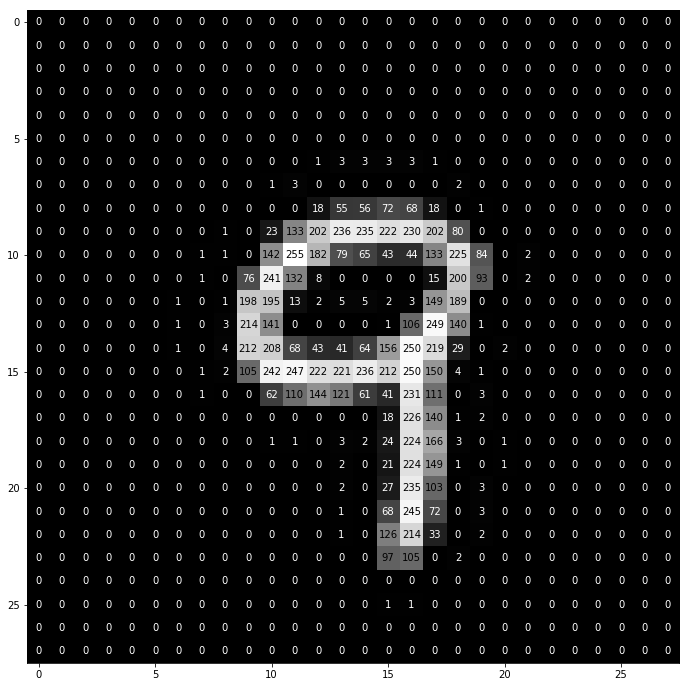

In [4]:
''' Our Test Data '''
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic = Image.open('demo_image/9.png')
gray = pic.convert('L')
gray_rz = gray.resize((28,28), Image.ANTIALIAS)
np_gray= np.array(gray_rz,int)
np_gray = np_gray.ravel()
''' command next line for white background '''
np_gray = 255 - np_gray
#print(np_gray)
#print(np_gray.shape)

test = np.array(np_gray).reshape(28,28)
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(test, ax)
